##### Processing and Analysis of BRCA RNA-seq Data for Molecular Subtyping

In [57]:
#import libaries
import pandas as pd
import numpy as np
import glob
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA   
import matplotlib.pyplot as plt
import seaborn as sns   

print("Libraries imported successfully.")

Libraries imported successfully.


In [58]:
#Importing gene sequence data
%run "C:\Projects\BRCA_ML_Project\src\sequence_data.py"
df_rnaseq =load_tpm()

Loading TPM gene expression file...


In [59]:
df_rnaseq.head()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
ENSG00000000005.6,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
ENSG00000000419.13,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457.14,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460.17,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


In [60]:
df_rnaseq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60660 entries, ENSG00000000003.15 to ENSG00000288675.1
Columns: 1226 entries, TCGA-D8-A146-01A to TCGA-A1-A0SN-01A
dtypes: float64(1226)
memory usage: 567.9+ MB


In [ ]:
#Check missing values
df_rnaseq.isnull().sum().sum()

np.int64(0)

In [62]:
df_rnaseq.index.duplicated().sum()

np.int64(0)

In [63]:
df_rnaseq.describe()

,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
count,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,...,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000,60660.000000
mean,1.289319,1.167079,1.140918,1.211242,1.065855,1.055439,1.180436,1.162599,1.241958,0.833770,...,1.183863,1.181252,1.231879,1.188433,1.140836,1.252786,1.273338,1.226024,1.216994,1.185920
std,2.051073,1.998165,1.959741,2.023648,1.843488,1.955383,2.008713,2.013372,2.088615,1.602100,...,2.013641,2.032840,2.014103,1.955514,2.004401,2.064537,2.062318,2.062334,2.013607,2.046046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.129745,0.068602,0.065986,0.096802,0.056792,0.000000,0.074231,0.044324,0.059078,0.000000,...,0.044394,0.050745,0.112767,0.114900,0.032383,0.059632,0.096802,0.072037,0.098958,0.051233
75%,1.829505,1.408277,1.337440,1.531905,1.299069,1.087582,1.419418,1.354537,1.577393,0.827494,...,1.478402,1.414961,1.643672,1.545647,1.338367,1.673681,1.751764,1.534622,1.565256,1.373384
max,14.571360,14.546416,15.443152,14.417607,15.888836,14.530633,14.776000,14.666185,13.704547,16.679705,...,14.669665,14.468154,14.711625,15.900268,14.024572,14.066172,14.139356,14.832117,14.559889,14.081353


In [64]:
#Extract and analyze tumor type codes from TCGA sample ids
sample_types_tumor = [c.split('-')[3][:2] for c in df_rnaseq.columns]

unique_types = set(sample_types_tumor)
print("Unique tumor type codes:", unique_types)


Unique tumor type codes: {'11', '01', '06'}


In [65]:
#For this project it focuses on primary solid tumor samples (code '01')

from collections import Counter

type_counts = Counter(sample_types_tumor)
print("Tumor type counts:\n", type_counts)


Tumor type counts:
 Counter({'01': 1106, '11': 113, '06': 7})


In [66]:
# Extract sample type code (characters 14-15 of TCGA barcode)
sample_types = [c.split('-')[3][:2] for c in df_rnaseq.columns]

# Keep only "01" samples
tumor_01_samples = [c for c, t in zip(df_rnaseq.columns, sample_types) if t == "01"]
df_tumor_01 = df_rnaseq[tumor_01_samples]   
# Check results
print("Shape after keeping only 01 samples:", df_tumor_01.shape)
print("First 10 samples:", df_tumor_01.columns[:10])


Shape after keeping only 01 samples: (60660, 1106)
First 10 samples: Index(['TCGA-D8-A146-01A', 'TCGA-AQ-A0Y5-01A', 'TCGA-C8-A274-01A',
       'TCGA-BH-A0BD-01A', 'TCGA-B6-A1KC-01B', 'TCGA-AC-A62V-01A',
       'TCGA-AO-A0J5-01A', 'TCGA-BH-A0B1-01A', 'TCGA-A2-A0YM-01A',
       'TCGA-AO-A03N-01B'],
      dtype='object')


In [67]:
#Confirm the remaining sammples
from collections import Counter
print("Remaining sample types:", Counter([c.split('-')[3][:2] for c in df_tumor_01.columns]))


Remaining sample types: Counter({'01': 1106})


In [68]:
# Clean sample IDs (columns)
df_tumor_01.columns = df_tumor_01.columns.str.split('.').str[0]

# Clean Ensembl gene IDs (rows)
df_tumor_01.index = df_tumor_01.index.str.split('.').str[0]


In [71]:
df_tumor_01.head()


,TCGA-D8-A146-01A,TCGA-AQ-A0Y5-01A,TCGA-C8-A274-01A,TCGA-BH-A0BD-01A,TCGA-B6-A1KC-01B,TCGA-AC-A62V-01A,TCGA-AO-A0J5-01A,TCGA-BH-A0B1-01A,TCGA-A2-A0YM-01A,TCGA-AO-A03N-01B,...,TCGA-E2-A1IG-01A,TCGA-E9-A1NA-01A,TCGA-D8-A1JP-01A,TCGA-AR-A252-01A,TCGA-D8-A1XL-01A,TCGA-BH-A0EI-01A,TCGA-E2-A1IO-01A,TCGA-E2-A15R-01A,TCGA-B6-A0IP-01A,TCGA-A1-A0SN-01A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,5.662037,3.703721,6.514515,4.784917,4.251984,3.536849,4.645690,6.021755,6.260931,3.613025,...,4.825501,4.142806,4.960919,4.770121,5.276757,6.436490,6.184500,2.670931,6.834395,3.650719
ENSG00000000005,3.376096,0.463099,0.000000,2.328061,0.435415,0.736475,1.255622,0.392647,0.467593,0.000000,...,0.134747,0.159500,0.079566,3.312418,0.000000,0.383608,0.755144,0.479644,0.526069,0.059909
ENSG00000000419,6.860140,7.086452,6.805072,6.443071,6.178436,6.823355,5.749910,6.977449,6.819887,6.079559,...,6.382933,6.436308,6.994589,6.005000,7.382161,7.220846,6.868277,7.033110,6.384368,8.153019
ENSG00000000457,4.400552,4.051007,5.037264,4.374970,3.558464,2.108324,4.487107,4.021000,3.319560,2.287502,...,3.891448,3.765057,4.946796,3.648707,3.664915,3.752192,4.093078,4.831796,4.368028,4.172247
ENSG00000000460,2.845169,2.426989,4.043248,4.162790,2.589548,2.277777,2.545178,3.372492,4.023974,1.753177,...,2.557655,2.566596,3.746915,2.494160,3.104957,3.111549,2.538538,3.730901,3.311721,3.301075


<Figure size 1200x600 with 0 Axes>

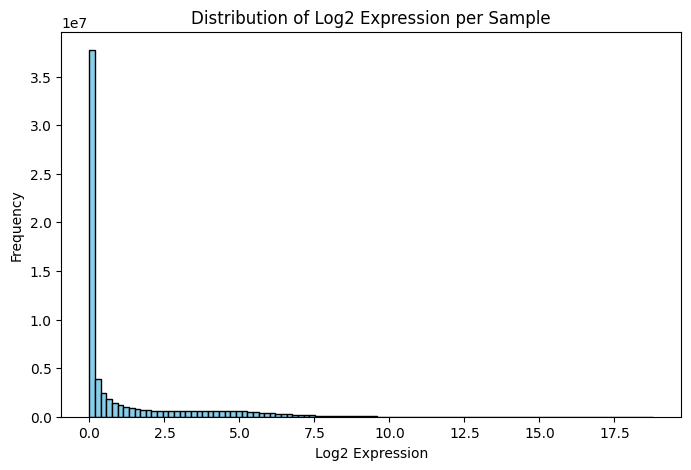

In [72]:
# Distribution of log2 expression per sample

import matplotlib.pyplot as plt

# df_tumor_01: genes x samples

plt.figure(figsize=(12,6))

plt.figure(figsize=(8,5))
plt.hist(df_tumor_01.values.flatten(), bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Log2 Expression')
plt.ylabel('Frequency')
plt.title('Distribution of Log2 Expression per Sample')
plt.show()

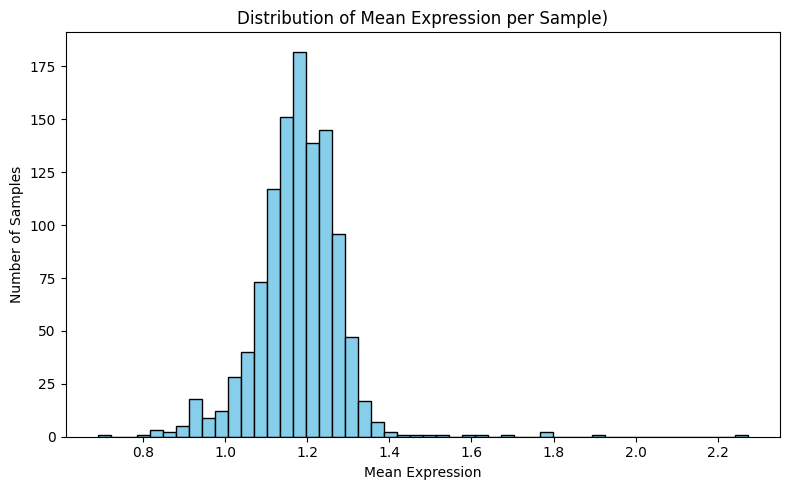

In [73]:

# distribution of mean expression per sample

import matplotlib.pyplot as plt

# Compute mean expression per sample (column-wise) without creating a copy
sample_means = df_tumor_01.mean(axis=0)  # returns a Series (samples)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(sample_means, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Expression per Sample)')
plt.xlabel('Mean Expression')
plt.ylabel('Number of Samples')
plt.tight_layout()
plt.show()


In [74]:
# Filter genes with low expression across 10 % of samples 
min_samples = int(0.1 * df_tumor_01.shape[1])
df_filtered = df_tumor_01.loc[df_tumor_01.gt(0).sum(axis=1) >= min_samples]
print("After filtering low-expression genes:", df_filtered.shape)


After filtering low-expression genes: (44267, 1106)


In [75]:
# Remove low variance genes 
variance_threshold = 0.25
high_var_genes = df_filtered.std(axis=1) > variance_threshold
df_high_var = df_filtered.loc[high_var_genes, :]
print("After variance filter:", df_high_var.shape)


After variance filter: (33472, 1106)


In [76]:
#standardize per gene (row wise)
from sklearn.preprocessing import StandardScaler

df_scaled = pd.DataFrame(
    StandardScaler().fit_transform(df_high_var.T).T,
    index=df_high_var.index,
    columns=df_high_var.columns
)

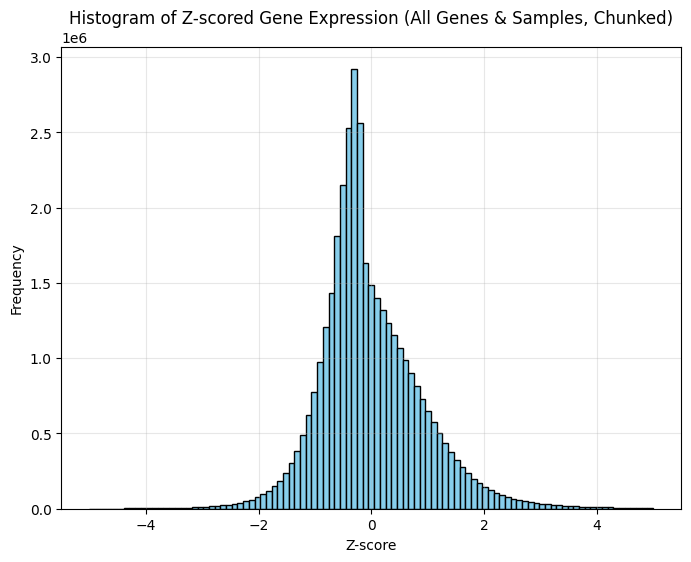

In [77]:
#Expression of genes histogram
import numpy as np

plt.figure(figsize=(8,6))

# Define bins
bins = np.linspace(-5, 5, 100)  # adjust range to focus on most data

# Incrementally count histogram
hist_counts = np.zeros(len(bins)-1)
for chunk in np.array_split(df_scaled.values, 10, axis=0):  # split by rows (genes)
    counts, _ = np.histogram(chunk, bins=bins)
    hist_counts += counts

plt.bar((bins[:-1]+bins[1:])/2, hist_counts, width=(bins[1]-bins[0]), color='skyblue', edgecolor='black')
plt.title("Histogram of Z-scored Gene Expression (All Genes & Samples, Chunked)")
plt.xlabel("Z-score")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()


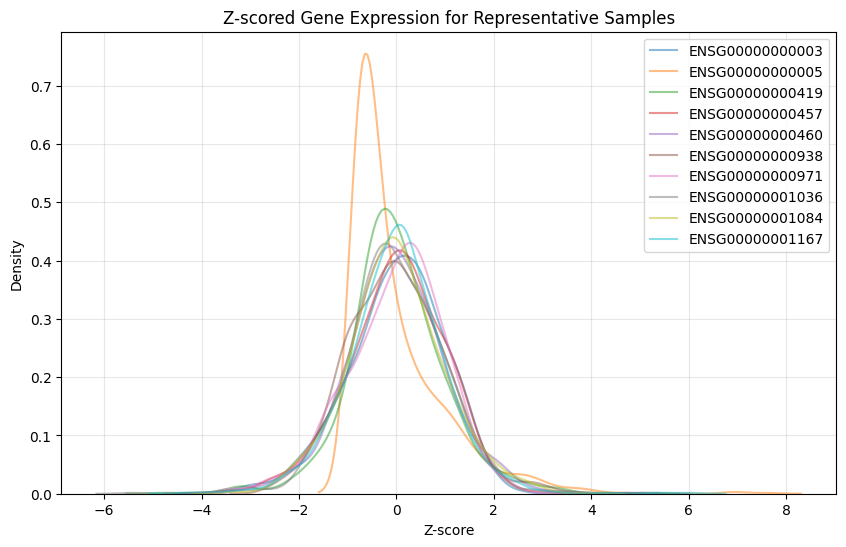

In [78]:
# Z-scored gene expression representative samples
plt.figure(figsize=(10,6))

for sample_id in df_scaled.index[:10]:  # first 10 samples as representative
    sns.kdeplot(df_scaled.loc[sample_id], label=sample_id, fill=False, alpha=0.5)

plt.title("Z-scored Gene Expression for Representative Samples")
plt.xlabel("Z-score")
plt.ylabel("Density")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [ ]:
#SAve processed BRCA RNA-seq samples
output_path = r"C:\Projects\BRCA_ML_Project\Data\Output\BRCA_Expression_Preprocessed.csv"
print(f"Data successfully saved to: {output_path}")

Data successfully saved to: C:\Projects\BRCA_ML_Project\Data\Output\BRCA_Expression_Preprocessed.csv


##### Molecular Subtyping of Breast Cancer Using Subtype Classifications 

In [ ]:
#Import Subtype data
subtype_df = pd.read_csv(r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\brca_pam50_cell21.csv")
subtype_df.head()

,Sample,Histology Annotations,subtype,Status,er_status_by_ihc,pr_status_by_ihc,HER2.newly.derived,Triple Negative Status,Biological group annotations,Special Comments,Special Comments2
0,TCGA-A1-A0SB-01A,Adenoid cystic carcinoma,normal-like,Tumor,Positive,Negative,Negative,No,-,Other specify,Adenoid Cystic Carcinoma
1,TCGA-A7-A5ZV-01A,Carcinoma with apocrine differentiation,Basal,Tumor,Negative,Negative,Negative,Yes,-,Infiltrating Carcinoma NOS,[Not Applicable]
2,TCGA-AR-A24U-01A,Carcinoma with apocrine differentiation,HER2E,Tumor,Negative,Negative,Positive,No,-,Infiltrating Ductal Carcinoma,[Not Applicable]
3,TCGA-A2-A04W-01A,Carcinoma with apocrine differentiation/ lipid...,HER2E,Tumor,Negative,Negative,Positive,No,-,Other specify,Apocrine
4,TCGA-A2-A0EM-01A,Cribriform carcinoma,LumA,Tumor,Positive,Positive,Negative,No,Cribriform carcinoma,Infiltrating Ductal Carcinoma,[Not Applicable]


In [81]:
subtype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sample                        1198 non-null   object
 1   Histology Annotations         1198 non-null   object
 2   subtype                       1198 non-null   object
 3   Status                        1198 non-null   object
 4   er_status_by_ihc              1192 non-null   object
 5   pr_status_by_ihc              1192 non-null   object
 6   HER2.newly.derived            1192 non-null   object
 7   Triple Negative Status        1142 non-null   object
 8   Biological group annotations  1198 non-null   object
 9   Special Comments              1198 non-null   object
 10  Special Comments2             1198 non-null   object
dtypes: object(11)
memory usage: 103.1+ KB


In [82]:
# Set 'Sample' column as the index
subtype_df.set_index('Sample', inplace=True)

# Verify the change
print("All columns:", subtype_df.columns.tolist())
print("Sample of index values:", subtype_df.index[:10].tolist())
print("Data types:")
print(subtype_df.dtypes)

All columns: ['Histology Annotations', 'subtype', 'Status', 'er_status_by_ihc', 'pr_status_by_ihc', 'HER2.newly.derived', 'Triple Negative Status', 'Biological group annotations', 'Special Comments', 'Special Comments2']
Sample of index values: ['TCGA-A1-A0SB-01A', 'TCGA-A7-A5ZV-01A', 'TCGA-AR-A24U-01A', 'TCGA-A2-A04W-01A', 'TCGA-A2-A0EM-01A', 'TCGA-C8-A26Z-01A', 'TCGA-E2-A15J-01A', 'TCGA-B6-A0IA-01A', 'TCGA-B6-A0X0-01A', 'TCGA-EW-A2FW-01A']
Data types:
Histology Annotations           object
subtype                         object
Status                          object
er_status_by_ihc                object
pr_status_by_ihc                object
HER2.newly.derived              object
Triple Negative Status          object
Biological group annotations    object
Special Comments                object
Special Comments2               object
dtype: object


In [83]:
subtype_df1= subtype_df[['Histology Annotations', 'subtype']]
print(subtype_df1.head())

                                              Histology Annotations  \
Sample                                                                
TCGA-A1-A0SB-01A                           Adenoid cystic carcinoma   
TCGA-A7-A5ZV-01A            Carcinoma with apocrine differentiation   
TCGA-AR-A24U-01A            Carcinoma with apocrine differentiation   
TCGA-A2-A04W-01A  Carcinoma with apocrine differentiation/ lipid...   
TCGA-A2-A0EM-01A                               Cribriform carcinoma   

                      subtype  
Sample                         
TCGA-A1-A0SB-01A  normal-like  
TCGA-A7-A5ZV-01A        Basal  
TCGA-AR-A24U-01A        HER2E  
TCGA-A2-A04W-01A        HER2E  
TCGA-A2-A0EM-01A         LumA  


In [84]:
subtype_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1198 entries, TCGA-A1-A0SB-01A to TCGA-AC-A23E-01A
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Histology Annotations  1198 non-null   object
 1   subtype                1198 non-null   object
dtypes: object(2)
memory usage: 28.1+ KB


In [ ]:
#missing values
subtype_df1.isnull().sum()

Histology Annotations    0
subtype                  0
dtype: int64

In [ ]:
#uniques values
counts = subtype_df1['subtype'].value_counts(dropna=False)
print(counts)

subtype
LumA           569
LumB           219
Basal          187
True Normal     97
HER2E           82
normal-like     39
CLOW             5
Name: count, dtype: int64


In [87]:
# Combine True Normal and Normal subtypes into a single 'Normal' category
#create a mapping dictionary
subtype_mapping = {
"True Normal": "Normal", # Combine True Normal into Normal
"normal-like": "Normal"
}

In [88]:
subtype_df1.loc[:, 'subtype'] = subtype_df1['subtype'].replace(subtype_mapping)

In [89]:
subtype_df_filtered = subtype_df1[subtype_df1['subtype'] != 'CLOW']
print(subtype_df_filtered['subtype'].value_counts())

subtype
LumA      569
LumB      219
Basal     187
Normal    136
HER2E      82
Name: count, dtype: int64


In [91]:
subtype_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, TCGA-A1-A0SB-01A to TCGA-AC-A23E-01A
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Histology Annotations  1193 non-null   object
 1   subtype                1193 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


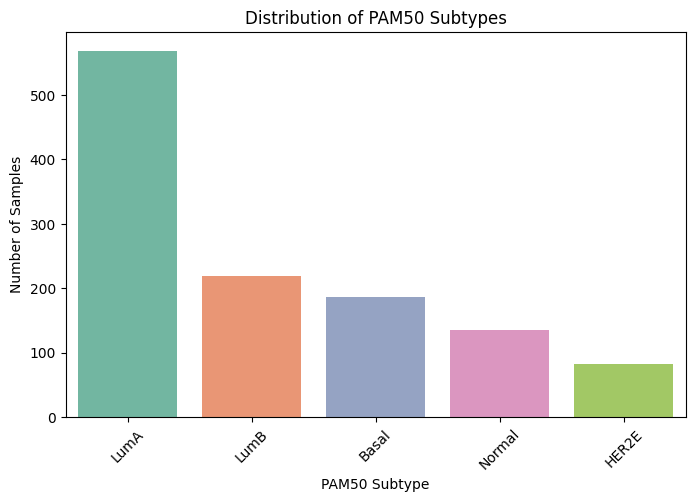

In [92]:
# Plot the distribution of subtype

plt.figure(figsize=(8,5))

sns.countplot(data=subtype_df_filtered, x='subtype', order=subtype_df_filtered['subtype'].value_counts().index, palette='Set2')

plt.title('Distribution of PAM50 Subtypes')
plt.xlabel('PAM50 Subtype')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

In [93]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(subtype_df_filtered['subtype'])
weights = compute_class_weight('balanced', classes=classes, y=subtype_df_filtered['subtype'])
class_weights = dict(zip(classes, weights))
print(class_weights)


{'Basal': np.float64(1.2759358288770053), 'HER2E': np.float64(2.9097560975609755), 'LumA': np.float64(0.41933216168717047), 'LumB': np.float64(1.089497716894977), 'Normal': np.float64(1.7544117647058823)}


In [94]:
counts = subtype_df_filtered['subtype'].value_counts(dropna=False)
print(counts)

subtype
LumA      569
LumB      219
Basal     187
Normal    136
HER2E      82
Name: count, dtype: int64


In [95]:
print("All columns:", subtype_df_filtered.columns.tolist())
print("Sample of index values:", subtype_df_filtered.index[:10].tolist())
print("Data types:")
print(subtype_df_filtered.dtypes)

All columns: ['Histology Annotations', 'subtype']
Sample of index values: ['TCGA-A1-A0SB-01A', 'TCGA-A7-A5ZV-01A', 'TCGA-AR-A24U-01A', 'TCGA-A2-A04W-01A', 'TCGA-A2-A0EM-01A', 'TCGA-C8-A26Z-01A', 'TCGA-E2-A15J-01A', 'TCGA-B6-A0IA-01A', 'TCGA-B6-A0X0-01A', 'TCGA-EW-A2FW-01A']
Data types:
Histology Annotations    object
subtype                  object
dtype: object


In [96]:
subtype_df_filtered.shape

(1193, 2)

In [97]:
#save the processed data
output_path = r"C:\Projects\BRCA_ML_Project\Data\Output\brca_subtype_final.csv"
print("brca subtype mapping saved successfully.")

brca subtype mapping saved successfully.


##### Merging processed TCGA-BRCA RNA-seq and Subtypes info

In [99]:
# Transpose a DataFrame called 'df_scaled':

df_scaled_T = df_scaled.T  # Transpose the scaled dataframe
df_scaled_T.shape

(1106, 33472)

In [100]:
df_scaled_T.head()

Ensembl_ID,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288605,ENSG00000288610,ENSG00000288611,ENSG00000288612,ENSG00000288657,ENSG00000288658,ENSG00000288662,ENSG00000288667,ENSG00000288670,ENSG00000288675
TCGA-D8-A146-01A,0.610197,2.328917,0.087625,0.818738,-0.121804,0.447096,0.692038,-0.180770,0.656173,0.377834,...,0.093708,-0.616491,0.089876,-0.255198,-0.192399,-0.402418,-0.299039,-0.277701,-0.352486,0.226766
TCGA-AQ-A0Y5-01A,-1.316444,-0.416462,0.451444,0.310375,-0.680297,-0.939375,0.643819,1.311532,0.185266,0.189404,...,-0.572282,-0.616491,-0.218659,0.419290,-0.192399,1.070073,-0.299039,-0.277701,1.329819,0.476578
TCGA-C8-A274-01A,1.448887,-0.852914,-0.000903,1.744744,1.478272,-1.157919,-1.153787,-0.979507,-0.698249,0.549215,...,-0.519725,-0.366014,-0.352346,-0.987668,-0.192399,0.024076,-0.299039,-0.277701,1.232449,-0.848617
TCGA-BH-A0BD-01A,-0.252735,1.341187,-0.582856,0.781533,1.637925,-0.057384,0.469463,-0.190368,-0.398721,0.141536,...,-0.140576,-0.302118,-0.284359,-0.973500,-0.192399,-0.387086,-0.299039,1.075270,1.215301,-0.989469
TCGA-B6-A1KC-01B,-0.777049,-0.442553,-1.008284,-0.405958,-0.463195,-1.836544,-0.482119,-0.811401,-0.931012,0.538368,...,-0.572282,1.192568,3.955282,-0.819282,-0.192399,1.679397,-0.299039,-0.277701,1.865646,-1.294831


In [101]:
# Merging (RNA seq + subtype)
merged_df = df_scaled_T.merge(subtype_df_filtered[['subtype']], left_index=True, right_index=True)
print(merged_df.shape)
print(merged_df['subtype'].value_counts())

(1089, 33473)
subtype
LumA      565
LumB      217
Basal     186
HER2E      82
Normal     39
Name: count, dtype: int64


In [102]:
merged_df.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000288610,ENSG00000288611,ENSG00000288612,ENSG00000288657,ENSG00000288658,ENSG00000288662,ENSG00000288667,ENSG00000288670,ENSG00000288675,subtype
TCGA-D8-A146-01A,0.610197,2.328917,0.087625,0.818738,-0.121804,0.447096,0.692038,-0.180770,0.656173,0.377834,...,-0.616491,0.089876,-0.255198,-0.192399,-0.402418,-0.299039,-0.277701,-0.352486,0.226766,LumA
TCGA-AQ-A0Y5-01A,-1.316444,-0.416462,0.451444,0.310375,-0.680297,-0.939375,0.643819,1.311532,0.185266,0.189404,...,-0.616491,-0.218659,0.419290,-0.192399,1.070073,-0.299039,-0.277701,1.329819,0.476578,LumA
TCGA-C8-A274-01A,1.448887,-0.852914,-0.000903,1.744744,1.478272,-1.157919,-1.153787,-0.979507,-0.698249,0.549215,...,-0.366014,-0.352346,-0.987668,-0.192399,0.024076,-0.299039,-0.277701,1.232449,-0.848617,LumB
TCGA-BH-A0BD-01A,-0.252735,1.341187,-0.582856,0.781533,1.637925,-0.057384,0.469463,-0.190368,-0.398721,0.141536,...,-0.302118,-0.284359,-0.973500,-0.192399,-0.387086,-0.299039,1.075270,1.215301,-0.989469,LumB
TCGA-B6-A1KC-01B,-0.777049,-0.442553,-1.008284,-0.405958,-0.463195,-1.836544,-0.482119,-0.811401,-0.931012,0.538368,...,1.192568,3.955282,-0.819282,-0.192399,1.679397,-0.299039,-0.277701,1.865646,-1.294831,LumB


In [103]:
missing = subtype_df_filtered.index.difference(df_scaled_T.index)
missing[:20]
len(missing)


104

##### PCA Analaysis

In [104]:
# Create Feature Matrix (x) and target vector (y)

X = merged_df.drop(columns=['subtype'])

y = merged_df['subtype']  # for coloring in plots

In [105]:
#Check if X is scaled
X.describe().loc[['mean','std']].T.head()

,mean,std
ENSG00000000003,0.008843,1.001170
ENSG00000000005,-0.018651,0.955427
ENSG00000000419,0.027584,0.972439
ENSG00000000457,0.003643,0.983957
ENSG00000000460,-0.004252,0.991418


In [107]:
# First, perform PCA and create the dataframe
from sklearn.decomposition import PCA

# Perform PCA with more components
pca_full = PCA(n_components=4)
X_pca_full = pca_full.fit_transform(X)  # Use your X from earlier

# Create complete PCA dataframe
pca_df_complete = pd.DataFrame(X_pca_full, 
                              columns=['PC1', 'PC2', 'PC3', 'PC4'], 
                              index=X.index)

pca_df_complete['subtype'] = y  # Add subtype labels


print(f"Shape: {pca_df_complete.shape}")
print(f"Variance explained: {pca_full.explained_variance_ratio_}")

Shape: (1089, 5)
Variance explained: [0.11546108 0.06167492 0.04887253 0.04410694]


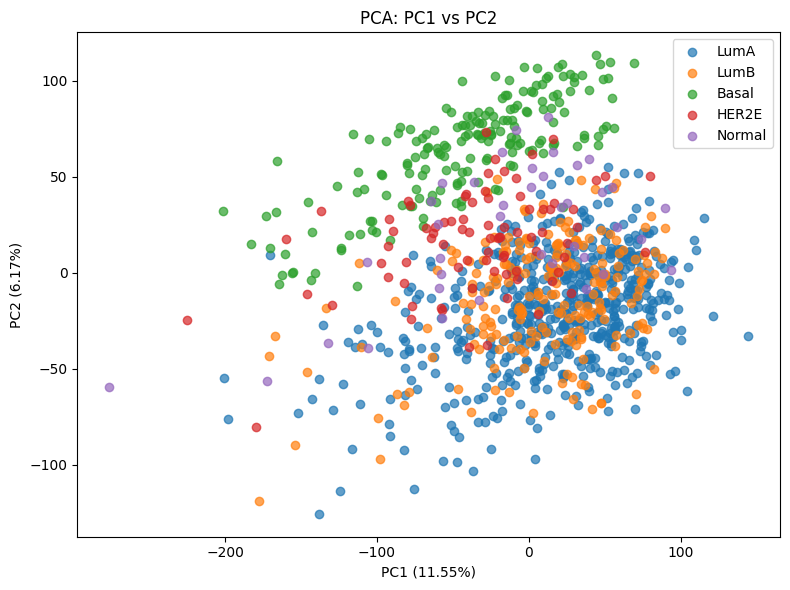

In [ ]:
#PCA plot
plt.figure(figsize=(8, 6))

for subtype in pca_df_complete['subtype'].unique():
    subset = pca_df_complete[pca_df_complete['subtype'] == subtype]
    plt.scatter(subset['PC1'], subset['PC2'], label=subtype, alpha=0.7)

plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca_full.explained_variance_ratio_[1]*100:.2f}%)")
plt.title("PCA: PC1 vs PC2")
plt.legend()
plt.tight_layout()

# Save
plt.savefig(r"C:\Projects\BRCA_ML_Project\imagesPCA_PC1_PC2.png", dpi=300)

plt.show()


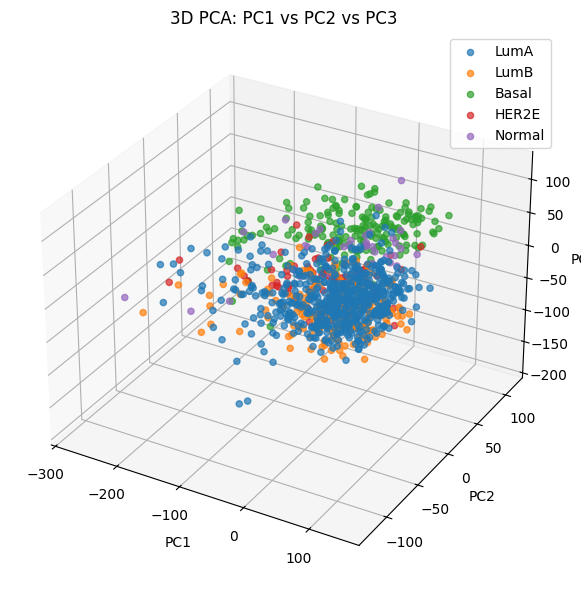

In [ ]:
#3-D visual
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

for subtype in pca_df_complete['subtype'].unique():
    subset = pca_df_complete[pca_df_complete['subtype'] == subtype]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], label=subtype, alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA: PC1 vs PC2 vs PC3")
ax.legend()

plt.tight_layout()
plt.savefig(r"C:\Projects\BRCA_ML_Project\Data\Output\PCA_3D_PC1_PC2_PC3.png", dpi=300)
plt.show()


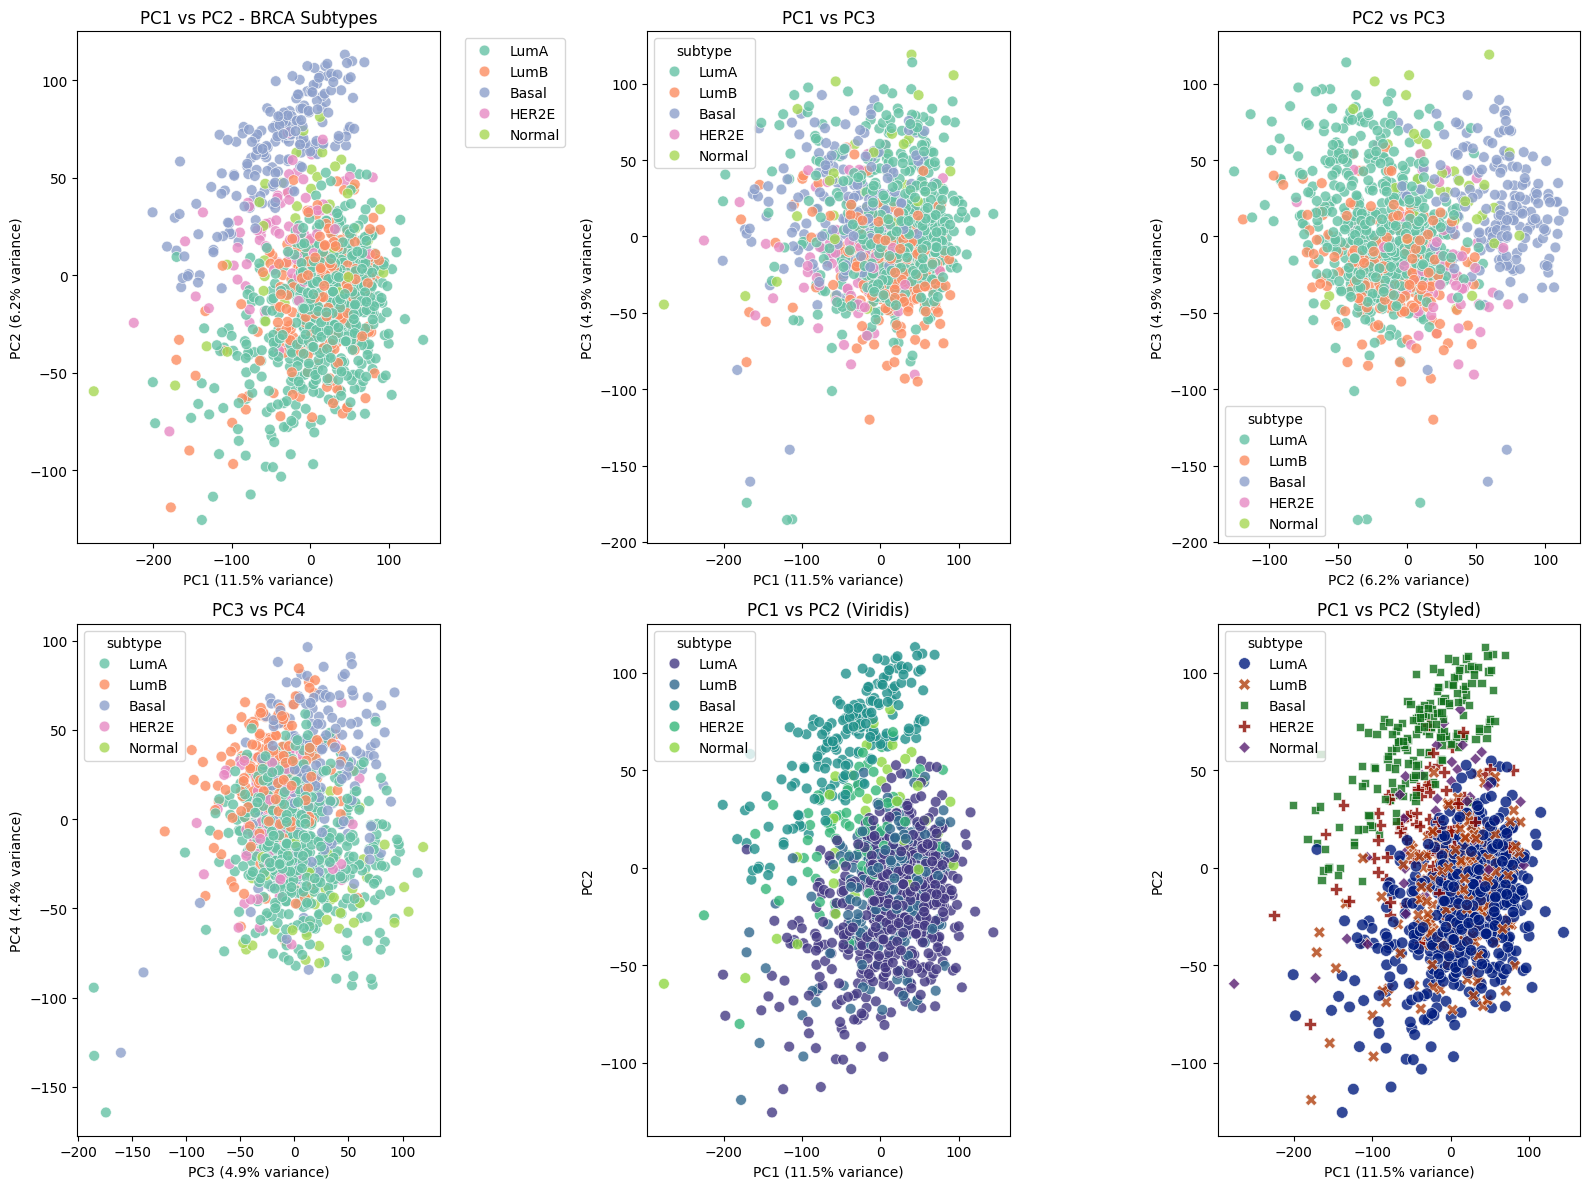

In [ ]:
#All PCA Analysis
plt.figure(figsize=(16, 12))

# Subplot 1: PC1 vs PC2
plt.subplot(2, 3, 1)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC2', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC2 - BRCA Subtypes")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Subplot 2: PC1 vs PC3
plt.subplot(2, 3, 2)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC3', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC3")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC3 ({pca_full.explained_variance_ratio_[2]*100:.1f}% variance)")

# Subplot 3: PC2 vs PC3
plt.subplot(2, 3, 3)
sns.scatterplot(data=pca_df_complete, x='PC2', y='PC3', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC2 vs PC3")
plt.xlabel(f"PC2 ({pca_full.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.ylabel(f"PC3 ({pca_full.explained_variance_ratio_[2]*100:.1f}% variance)")

# Subplot 4: PC3 vs PC4
plt.subplot(2, 3, 4)
sns.scatterplot(data=pca_df_complete, x='PC3', y='PC4', hue='subtype', 
                palette='Set2', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC3 vs PC4")
plt.xlabel(f"PC3 ({pca_full.explained_variance_ratio_[2]*100:.1f}% variance)")
plt.ylabel(f"PC4 ({pca_full.explained_variance_ratio_[3]*100:.1f}% variance)")

# Subplot 5: Different color palette
plt.subplot(2, 3, 5)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC2', hue='subtype', 
                palette='viridis', s=60, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC2 (Viridis)")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")

# Subplot 6: With different markers
plt.subplot(2, 3, 6)
sns.scatterplot(data=pca_df_complete, x='PC1', y='PC2', hue='subtype', style='subtype',
                palette='dark', s=70, alpha=0.8, edgecolor='w', linewidth=0.5)
plt.title("PC1 vs PC2 (Styled)")
plt.xlabel(f"PC1 ({pca_full.explained_variance_ratio_[0]*100:.1f}% variance)")

plt.tight_layout()
plt.show()

In [ ]:
# Save the PCA plot after creating the output directory
from pathlib import Path

OUTPUT_DIR = Path(r"C:\Projects\BRCA_ML_Project\Data\Output")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


In [ ]:
# Save preprocessing outputs

import joblib

joblib.dump(X, OUTPUT_DIR / "X_expression_scaled.pkl")
joblib.dump(y, OUTPUT_DIR / "y_subtype.pkl")

['C:\\Projects\\BRCA_ML_Project\\Data\\Output\\y_subtype.pkl']

In [113]:
#PCA model (QC only)
joblib.dump(pca_full, OUTPUT_DIR / "pca_qc_model.pkl")

['C:\\Projects\\BRCA_ML_Project\\Data\\Output\\pca_qc_model.pkl']

##### Annotation of preprocessed RNA Seq (Ensembl_ID) using GENCODE

In [114]:
# Load GTF file, extraction and keep gene-level rows
import gzip
import shutil

input_path = r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf.gz"
output_path = r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf"

# Decompress the gzipped GTF file
with gzip.open(input_path, "rb") as f_in:
    with open(output_path, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

print("Extraction completed:", output_path)

Extraction completed: C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf


In [115]:
#Extract gene_id, and gene_name
import pandas as pd

gtf_path = r"C:\Projects\BRCA_ML_Project\Data\Raw_Data\gencode.v38.annotation.gtf"

# Read only gene-level annotations
gtf_cols = ['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
gtf = pd.read_csv(gtf_path, sep='\t', comment='#', names=gtf_cols)

# Keep only genes
gtf_genes = gtf[gtf['feature'] == 'gene'].copy()

# Extract gene_id and gene_name from the 'attribute' column
gtf_genes['gene_id'] = gtf_genes['attribute'].str.extract('gene_id "([^"]+)"')
gtf_genes['gene_name'] = gtf_genes['attribute'].str.extract('gene_name "([^"]+)"')

gtf_genes = gtf_genes[['gene_id', 'gene_name', 'chr', 'start', 'end', 'strand']]
print(gtf_genes.head())


              gene_id    gene_name   chr  start    end strand
0   ENSG00000223972.5      DDX11L1  chr1  11869  14409      +
12  ENSG00000227232.5       WASH7P  chr1  14404  29570      -
25  ENSG00000278267.1    MIR6859-1  chr1  17369  17436      -
28  ENSG00000243485.5  MIR1302-2HG  chr1  29554  31109      +
36  ENSG00000284332.1    MIR1302-2  chr1  30366  30503      +


In [116]:
# Remove version number from Ensembl gene_id
gtf_genes['gene_id'] = gtf_genes['gene_id'].str.split('.').str[0]


In [117]:
print(gtf_genes.head())
print(gtf_genes['gene_id'].str.contains('\.').any())

            gene_id    gene_name   chr  start    end strand
0   ENSG00000223972      DDX11L1  chr1  11869  14409      +
12  ENSG00000227232       WASH7P  chr1  14404  29570      -
25  ENSG00000278267    MIR6859-1  chr1  17369  17436      -
28  ENSG00000243485  MIR1302-2HG  chr1  29554  31109      +
36  ENSG00000284332    MIR1302-2  chr1  30366  30503      +
False


In [118]:
#Expression matrix before annotation (samples x genes)
df_expr = df_scaled_T.copy()  # or your full expression matrix
print(df_expr.shape) 

(1106, 33472)


In [119]:
#Merge Expression with annotation
# Suppose df_expr is your expression matrix (samples x gene_ids)
df_expr_annot = df_expr.T.merge(
    gtf_genes[['gene_id', 'gene_name']], 
    left_index=True, right_on='gene_id'
)
# Transpose back to samples x genes
df_expr_annot.set_index('gene_name', inplace=True)
df_expr_annot = df_expr_annot.T  # back to samples x genes

print(df_expr_annot.shape)
print(df_expr_annot.head())


(1107, 33473)
gene_name           TSPAN6      TNMD      DPM1     SCYL3  C1orf112       FGR  \
TCGA-D8-A146-01A  0.610197  2.328917  0.087625  0.818738 -0.121804  0.447096   
TCGA-AQ-A0Y5-01A -1.316444 -0.416462  0.451444  0.310375 -0.680297 -0.939375   
TCGA-C8-A274-01A  1.448887 -0.852914 -0.000903  1.744744  1.478272 -1.157919   
TCGA-BH-A0BD-01A -0.252735  1.341187 -0.582856  0.781533  1.637925 -0.057384   
TCGA-B6-A1KC-01B -0.777049 -0.442553 -1.008284 -0.405958 -0.463195 -1.836544   

gene_name              CFH     FUCA2      GCLC      NFYA  ... RP11-84E24.4  \
TCGA-D8-A146-01A  0.692038  -0.18077  0.656173  0.377834  ...     0.093708   
TCGA-AQ-A0Y5-01A  0.643819  1.311532  0.185266  0.189404  ...    -0.572282   
TCGA-C8-A274-01A -1.153787 -0.979507 -0.698249  0.549215  ...    -0.519725   
TCGA-BH-A0BD-01A  0.469463 -0.190368 -0.398721  0.141536  ...    -0.140576   
TCGA-B6-A1KC-01B -0.482119 -0.811401 -0.931012  0.538368  ...    -0.572282   

gene_name        RP11-736N17.12    N

In [120]:
#subtype df
df_subtype = subtype_df_filtered.copy()  # or your full expression matrix
print(df_subtype.shape) 

(1193, 2)


In [ ]:
# Subtype Alignment: Get the common samples
common_samples = df_expr_annot.index.intersection(df_subtype.index)
print(f"Number of common samples: {len(common_samples)}")

# Subset both matrices to common samples
X = df_expr_annot.loc[common_samples].copy()
y = df_subtype.loc[common_samples, 'subtype'].copy()

print(X.shape, y.shape)


Number of common samples: 1089
(1089, 33473) (1089,)


In [ ]:
# Check for duplicates
print("Number of duplicated gene symbols:", df_expr_annot.columns.duplicated().sum())

Number of duplicated gene symbols: 432


In [127]:
#Make sure the dataframe is all numeric before collapsing
# Convert all columns to numeric (float)
df_expr_annot = df_expr_annot.apply(pd.to_numeric, errors='coerce')

# Drop columns that became all NaN after conversion
df_expr_annot = df_expr_annot.dropna(axis=1, how='all')


In [ ]:
# Suppose df_expr_annot is expression matrix (samples x genes, with gene symbols as columns)
# Collapse duplicates efficiently (mean across duplicates)
X_values = df_expr_annot.values
gene_names = np.array(df_expr_annot.columns)

unique_genes, inverse_idx = np.unique(gene_names, return_inverse=True)
X_collapsed = np.zeros((X_values.shape[0], len(unique_genes)), dtype=X_values.dtype)

for i, gene in enumerate(unique_genes):
    cols = np.where(inverse_idx == i)[0]
    X_collapsed[:, i] = X_values[:, cols].mean(axis=1)

# 3️Create new DataFrame
df_expr_annot_collapsed = pd.DataFrame(
    X_collapsed,
    index=df_expr_annot.index,
    columns=unique_genes
)

# 4Verify duplicates removed
print("Any duplicate gene names left?", df_expr_annot_collapsed.columns.duplicated().any())
print("New shape:", df_expr_annot_collapsed.shape)


Any duplicate gene names left? False
New shape: (1107, 33041)


In [131]:
df_expr_annot_collapsed.columns.duplicated().any()  # Should be False

np.False_

In [132]:
# Keep Protein coding genes only
gtf_genes['gene_type'] = gtf['attribute'].str.extract('gene_type "([^"]+)"')

protein_coding = gtf_genes[
    gtf_genes['gene_type'] == 'protein_coding'
]['gene_name']

df_expr_annot_collapsed = df_expr_annot_collapsed.loc[:, df_expr_annot_collapsed.columns.isin(protein_coding)]


In [133]:
print("Shape after keeping protein-coding genes:", df_expr_annot_collapsed.shape)
print("Any duplicate gene names left?", df_expr_annot_collapsed.columns.duplicated().any())

Shape after keeping protein-coding genes: (1107, 16858)
Any duplicate gene names left? False


In [135]:
df_expr_annot_collapsed.head()

,A2M,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADAC,AADACL2,AADAT,AAGAB,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-D8-A146-01A,0.719003,-0.514409,0.526420,0.779577,0.344666,-0.256473,0.508084,-0.177595,-0.378382,0.255976,...,-0.085078,-1.004802,1.252065,1.166125,1.075030,1.209877,0.930510,0.302356,0.494967,0.599905
TCGA-AQ-A0Y5-01A,0.415009,-0.271370,-0.053788,0.622910,-0.423323,1.499280,-0.342089,-0.177595,-0.385980,1.256588,...,0.527851,-0.090652,0.358557,0.308460,-0.197254,-1.475569,0.410837,0.342306,0.837515,0.065908
TCGA-C8-A274-01A,-1.262575,-0.570491,-0.632542,-0.977111,-0.028551,0.279440,-0.563517,-0.177595,-0.854717,0.611976,...,0.345195,0.508305,1.491217,1.254943,-0.177998,1.060076,-0.329471,-0.350742,0.522061,-0.206265
TCGA-BH-A0BD-01A,0.451058,0.078875,-0.632542,0.729550,0.216231,0.913525,-0.049300,-0.177595,0.125076,0.068099,...,0.535615,0.775661,0.070927,-0.016460,0.237853,0.444492,0.406110,0.741420,0.671811,-0.125059
TCGA-B6-A1KC-01B,-0.434732,-0.581614,-0.632542,-2.423464,-0.516487,-0.291319,-0.371734,-0.177595,0.218082,0.200232,...,-1.136258,-0.612079,1.318311,0.831083,0.198381,-1.091466,0.442233,-2.613056,0.952255,0.267108


In [138]:
# Keep only protein-coding genes
protein_coding = gtf_genes[gtf_genes['gene_type'] == 'protein_coding']['gene_name']

# Filter your collapsed expression matrix
df_final = df_expr_annot_collapsed.loc[:, df_expr_annot_collapsed.columns.isin(protein_coding)]

# Verify
print("Shape after keeping protein-coding genes:", df_final.shape)
print("Any duplicate gene names left?", df_final.columns.duplicated().any())


Shape after keeping protein-coding genes: (1107, 16858)
Any duplicate gene names left? False


In [139]:
# Save for model training and biomarker isolation

import pandas as pd
import joblib
from pathlib import Path

OUTPUT_DIR = Path(r"C:\Projects\BRCA_ML_Project\Data\Output")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


joblib.dump(df_final, OUTPUT_DIR / "X_expression_annotated_collapsed_protein_coding.pkl")
joblib.dump(y, OUTPUT_DIR / "y_subtype.pkl")

print("Expression matrix and subtype vector saved")

Expression matrix and subtype vector saved


====================================END===================================